In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

In [2]:
%run ../data/neuron_gen.py

In [3]:
def bench_mark(times, value, func):
    res = np.empty(times)
    for i in range(times):
        s = time.perf_counter()
        func(value)
        res[i] = time.perf_counter() - s
    return res 

In [4]:
def bench_mark_rng(start, stop, step, times, func):
    vals = np.arange(start, stop, step)
    res = np.empty((vals.size, times))
    for i, v in enumerate(vals):
        for t in range(times):
            s = time.perf_counter()
            func(v)
            res[i, t] = time.perf_counter() - s
    return res

In [5]:
v1 = bench_mark_rng(100, 600, 100, 10, lambda x : genNeuronsV1(num_of_neurons=100_000, max_adjacent=x, bench_mark=True))
v2 = bench_mark_rng(100, 600, 100, 10, lambda x : genNeuronsV2(num_of_neurons=100_000, max_adjacent=x, bench_mark=True))
v3 = bench_mark_rng(100, 600, 100, 10, lambda x : genNeuronsV3(num_of_neurons=100_000, max_adjacent=x, bench_mark=True))

In [6]:
np.savetxt("v1_100_500.csv", v1, delimiter=",")
np.savetxt("v2_100_500.csv", v2, delimiter=",")
np.savetxt("v3_100_500.csv", v3, delimiter=",")

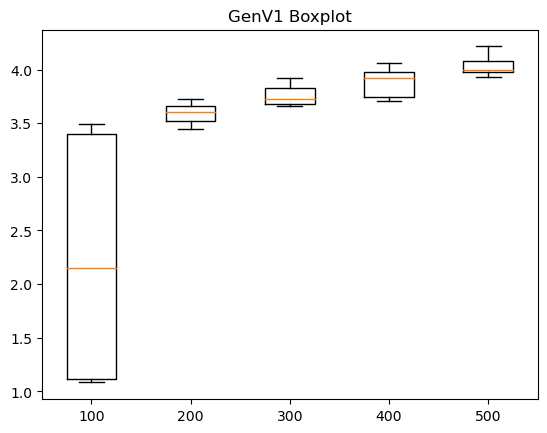

In [7]:
plt.title("GenV1 Boxplot")
labels = [100, 200, 300, 400, 500]

plt.boxplot([v1[x, :] for x in range(v1.shape[0])], labels=labels)

plt.show()

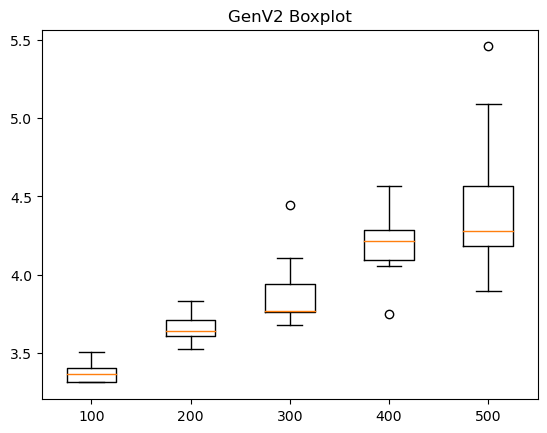

In [8]:
plt.title("GenV2 Boxplot")
labels = [100, 200, 300, 400, 500]

plt.boxplot([v2[x, :] for x in range(v2.shape[0])], labels=labels)

plt.show()

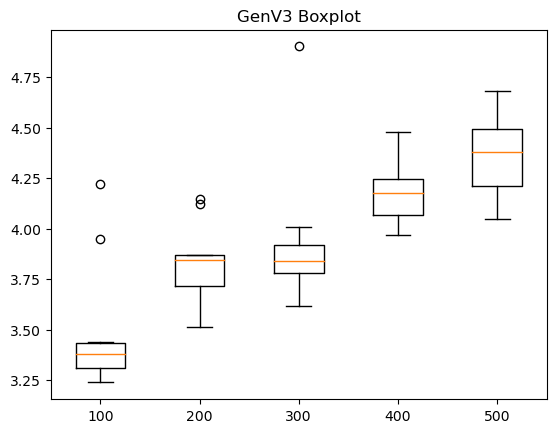

In [9]:
plt.title("GenV3 Boxplot")
labels = [100, 200, 300, 400, 500]

plt.boxplot([v3[x, :] for x in range(v3.shape[0])], labels=labels)

plt.show()